In [1]:
import math
import numpy as np
import pandas as pd
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn-whitegrid')

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

C:\Users\Deevita\AppData\Local\Temp\ipykernel_3092\4012932612.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [2]:
df = pd.read_csv('00 df.csv')
train = df[df['flag']=='train']
test = df[df['flag']=='test']

In [3]:
df

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0
...,...,...,...,...,...,...,...,...,...,...,...
48837,b. 31-40,e. High,b. Mid,a. = 0,b. Mid,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,test,0
48838,b. 31-40,b. Mid - Low,a. Low,a. = 0,b. Mid,b. 9-12,b. Mid,a. no income,c. 31-35 & 61-70,test,0
48839,d. 41-50 & 61-70,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,test,0
48840,b. 31-40,b. Mid - Low,a. Low,c. > 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,test,0


In [4]:
cat_feats = ['age_bin','capital_gl_bin','education_bin','hours_per_week_bin','msr_bin','occupation_bin','race_sex_bin']

y_train = train['y']
x_train = train[['age_bin','capital_gl_bin','education_bin','hours_per_week_bin','msr_bin','occupation_bin','race_sex_bin']]
x_train = pd.get_dummies(x_train,columns=cat_feats,drop_first=True)

y_test = test['y']
x_test = test[['age_bin','capital_gl_bin','education_bin','hours_per_week_bin','msr_bin','occupation_bin','race_sex_bin']]
x_test = pd.get_dummies(x_test,columns=cat_feats,drop_first=True)

In [5]:
x_train

,age_bin_b. 26-30 & 71-100,age_bin_c. 31-35 & 61-70,age_bin_d. 36-40 & 56-60,age_bin_e. 40-55,capital_gl_bin_b. < 0,capital_gl_bin_c. > 0,education_bin_b. Mid,education_bin_c. Bachelors,education_bin_d. Masters,education_bin_e. High,...,hours_per_week_bin_d. 41-50 & 61-70,hours_per_week_bin_e. 51-60,msr_bin_b. Mid,msr_bin_c. High,occupation_bin_b. Mid - Low,occupation_bin_c. Mid - Mid,occupation_bin_d. Mid - High,occupation_bin_e. High,race_sex_bin_b. Mid,race_sex_bin_c. High
0,False,False,True,False,False,True,False,True,False,False,...,False,False,True,False,True,False,False,False,False,True
1,False,False,False,True,False,False,False,True,False,False,...,False,False,False,True,False,False,False,True,False,True
2,False,False,True,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,True
3,False,False,False,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
4,True,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,True,False,False,False,False,False,True,False,False,False,...,False,False,False,True,False,False,True,False,True,False
32557,False,False,True,False,False,False,True,False,False,False,...,False,False,False,True,True,False,False,False,False,True
32558,False,False,True,False,False,False,True,False,False,False,...,False,False,True,False,True,False,False,False,True,False
32559,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,True


In [6]:
y_train

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: y, Length: 32561, dtype: int64

In [7]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)
pred_i = knn.predict(x_test.values)
print(np.mean(pred_i != y_test))

C:\Users\Deevita\anaconda3\Deevita\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.22191511577912904


In [10]:
error_rate = []
for i in range(1,15):    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test.values)
    error_rate.append(np.mean(pred_i != y_test))

C:\Users\Deevita\anaconda3\Deevita\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Deevita\anaconda3\Deevita\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Deevita\anaconda3\Deevita\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Deevita\anaconda3\Deevita\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Deevita\anaconda3\Deevita\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Deevita\ana

Text(0, 0.5, 'Error Rate')

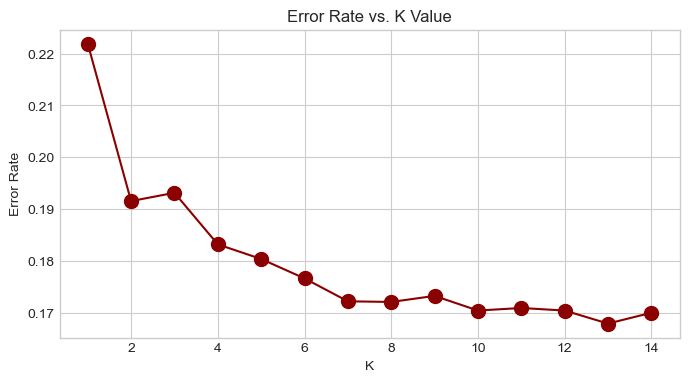

In [11]:
plt.figure(figsize=(8,4))
plt.plot(range(1,15),error_rate,color='darkred', marker='o',markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [13]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test.values)

C:\Users\Deevita\anaconda3\Deevita\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [14]:
test_calc = pd.concat([pd.DataFrame(y_pred).reset_index(drop = True),pd.DataFrame(y_test).reset_index(drop = True)],axis = 1)

In [15]:
test_calc

,0,y
0,0,0
1,1,0
2,0,1
3,1,1
4,0,0
...,...,...
16276,0,0
16277,0,0
16278,1,0
16279,1,0


In [18]:
test_calc.rename(columns={0:'predicted'},inplace=True)

In [19]:
test_calc

,predicted,y
0,0,0
1,1,0
2,0,1
3,1,1
4,0,0
...,...,...
16276,0,0
16277,0,0
16278,1,0
16279,1,0


In [20]:
df_table = confusion_matrix(test_calc['y'],test_calc['predicted'])

In [21]:
df_table

array([[11489,   946],
       [ 1784,  2062]], dtype=int64)

In [26]:
print('accuracy:', (df_table[0,0] + df_table[1,1]) / (df_table[0,0] + df_table[0,1] + df_table[1,0] + df_table[1,1]))
print ('precision:', df_table[1,1] / (df_table[1,1] + df_table[0,1]))
print('recall:', df_table[1,1] / (df_table[1,1] + df_table[1,0]))

accuracy: 0.8323198820711258
precision: 0.6855053191489362
recall: 0.5361414456578263


In [28]:
p = df_table[1,1] / (df_table[1,1] + df_table[0,1])
r = df_table[1,1] / (df_table[1,1] + df_table[1,0])
print('f1 score: ', (2*p*r)/(p+r))

f1 score:  0.6016924423694193
